# k-Nearest Neighbor (kNN) exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments_page_NOT_Working](http://vision.standford.edu/teaching/cs231n/assignments.html) on the course website*

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to ALL training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In this exercise you will implement these steps and understand the basic Image Classification pipeline, cross-validation, and gain proficiency in writing efficient, vectorized code.

In [61]:
# Run some setup code for this notebook

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py/'

# Cleaning up variables to prevent loading data multiple times which may cause memory issue
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

Clear previously loaded data.
load_CIFAR10 function is called.


In [63]:
# As a Sanity Check, we print out the size (shape) of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


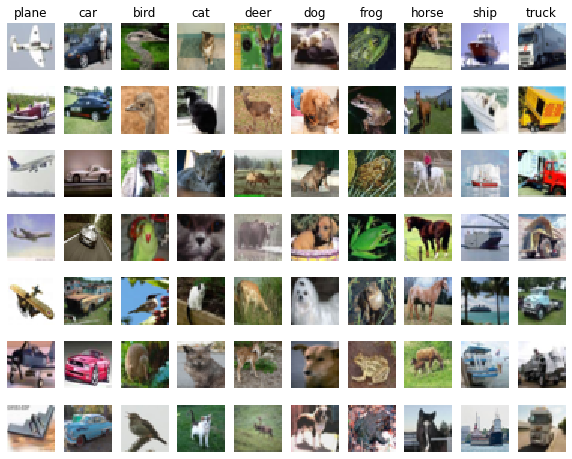

In [64]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    # print(y, cls)
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        # print(plt_idx)
        if i == 0:
            plt.title(cls)
plt.show()

In [65]:
# Subsample the data for more efficient code execution
# Training: From 50000 to 5000
# Testing: From 5000 to 500
# dists.shape: 500 * 5000
num_training = 5000

# Before Subsampling
print(X_train.shape)
print(y_train.shape)

mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

# After Subsampling
print(X_train.shape)
print(y_train.shape)

num_test = 500
print(X_test.shape)
print(y_test.shape)

mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(5000, 32, 32, 3)
(5000,)
(10000, 32, 32, 3)
(10000,)
(500, 32, 32, 3)
(500,)


In [66]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_train.shape

(5000, 3072)

In [67]:
# Before Reshape
print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], -1))

# After Reshape
print(X_test.shape)

(500, 32, 32, 3)
(500, 3072)


In [68]:
from cs231n.classifiers import WKNearestNeighbor

# Create a kNN classifier instance
# Remember that training a kNN classifier is a noop:
# the Classifier simply remembers the data and does no further processing
classifier = WKNearestNeighbor()
classifier.train(X_train, y_train)

Train function is called.
Samples SAVED.


We would now like to classify the test data with kNN classifier. Recall that we can break down this process into two steps:

1. First we must compute the distances between ALL test examples and ALL train examples.
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix bewteen ALL training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each elementj (i,j) is the distance between the i-th test and j-th train example.

**Note: For the three distance computations that we require you to implement in this notebook, you may not use the np.linalg.norm() function that numpy provides.**

First, open `cs231n/classifiers/k_nearest_neighbor.py` and implement the function
`compute_distance_two_loops` that uses a (very inefficient) double loop over ALL pairs of (test, train)
examples and computes the distance matrix one element at a time.

In [71]:
# Open cs231n/classifiers/w_k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_two_loops(X_test)

Mark 1 - on Yuan Xiao Day night


In [72]:
dists[0]

array([3803.92350081, 4210.59603857, 5504.0544147 , ..., 4007.64756434,
       4203.28086142, 4354.20256764])

In [79]:
print(y_test[0])
print(y_test.shape)

3
(500,)


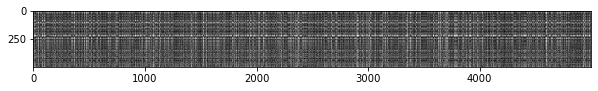

In [81]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to traning examples
plt.imshow(dists, interpolation='none')
plt.show()

In [82]:
# Now implement the function predict_labels and run the code below:
# We use k=1 (which is Nearest Neighbor)
y_test_pred = classifier.predict_labels(dists, k=1)

In [83]:
print(y_test_pred.shape)

(500,)


In [85]:
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [86]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 139 / 500 correct => accuracy: 0.278000


In [88]:
# Now lets speed up distance matrix computation by using Partial Vectorization
# with ONE loop. Implement the function compute_distances_one_loop and run the
# code below:
dists_one = classifier.compute_distances_one_loop(X_test)

# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# In case you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('One loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

One loop difference was: 0.000000
Good! The distance matrices are the same


In [91]:
# Now implement the Fully Vectorized version inside compute_distancec_no_loops
# and run the code
dists_two = classifier.compute_distances_no_loops(X_test)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('No loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

No loop difference was: 0.000000
Good! The distance matrices are the same


In [92]:
# Let's compare how fast the implementation are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

In [93]:
two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

# You should see significantly faster performance with the fully vectorized implementation


Mark 1 - on Yuan Xiao Day night
Two loop version took 79.016104 seconds
One loop version took 54.114899 seconds
No loop version took 0.559469 seconds


In [ ]:
### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the value = 5 arbitrarily. We will now determine the Best Value of this Hyperparameter with Cross-Validation

In [99]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be list of length num_folds, where                 #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different value of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}

################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for k in k_choices:
    k_to_accuracies[k] = []
    for i in range(num_folds):
        # prepare training data for the current fold
        X_train_fold = np.concatenate([ fold for j, fold in enumerate(X_train_folds) if i != j])
        y_train_fold = np.concatenate([ fold for j, fold in enumerate(y_train_folds) if i != j])

        # use of k-nearest-neighbor algorithm
        classifier.train(X_train_fold, y_train_fold)
        y_pred_fold = classifier.predict(X_train_folds[i], k=k, num_loops=0)

        # Compute the fraction of correctly predicted examples
        num_correct = np.sum(y_pred_fold == y_train_folds[i])
        accuracy = float(num_correct) / X_train_folds[i].shape[0]
        k_to_accuracies[k].append(accuracy)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

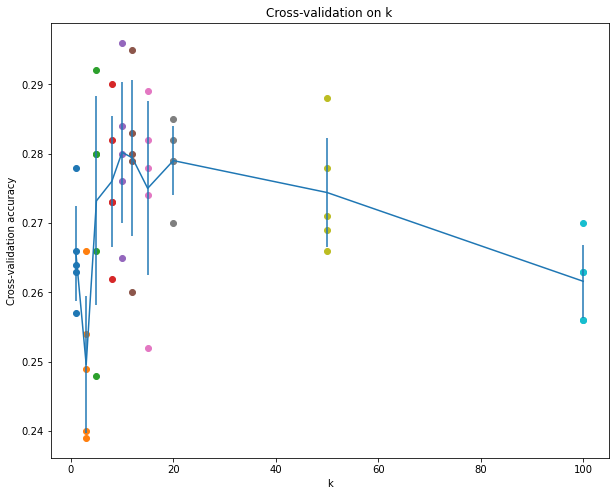

In [101]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [103]:
# Based on the cross-validation result above, choose the best value for k,
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 10

classifier = WKNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 141 / 500 correct => accuracy: 0.282000


# The below are draft

In [74]:
## Cross-Validation
We have implemented the k-Nearest Neighbor classifier but we set the value k =5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

In [2]:
import numpy as np

In [5]:
X_train = np.array([[1,2,3],[4,5,6],[7,8,9]])
y_train = np.array([3,2,1])

In [6]:
X_train

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
y_train

array([3, 2, 1])

In [9]:
num_folds = 2
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

print(X_train_folds)
print(y_train_folds)

[array([[1, 2, 3],
       [4, 5, 6]]), array([[7, 8, 9]])]
[array([3, 2]), array([1])]


In [12]:
k_to_accuracies = {}

In [23]:
for i in range(num_folds):
    print([ fold for j, fold in enumerate(X_train_folds) if i != j ])
        

[array([[7, 8, 9]])]
[array([[1, 2, 3],
       [4, 5, 6]])]


In [19]:
################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for k in k_choices:
    k_to_accuracies[k] = []
    for i in range(num_folds):
        # prepare training data for the current fold
        X_train_fold = np.concatenate([ fold for j, fold in enumerate(X_train_folds) if i != j ])
        y_train_fold = np.concatenate([ fold for j, fold in enumerate(y_train_folds) if i != j ])
        print(k, i)
        print(X_train_fold)
        #print(y_train_fold)
        print("==")

        # use of k-nearest-neighbor algorithm
        #classifier.train(X_train_fold, y_train_fold)
        #y_pred_fold = classifier.predict(X_train_folds[i], k=k, num_loops=0)
    #print(k)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



1 0
[[7 8 9]]
==
1 1
[[1 2 3]
 [4 5 6]]
==
3 0
[[7 8 9]]
==
3 1
[[1 2 3]
 [4 5 6]]
==
5 0
[[7 8 9]]
==
5 1
[[1 2 3]
 [4 5 6]]
==
8 0
[[7 8 9]]
==
8 1
[[1 2 3]
 [4 5 6]]
==
10 0
[[7 8 9]]
==
10 1
[[1 2 3]
 [4 5 6]]
==
12 0
[[7 8 9]]
==
12 1
[[1 2 3]
 [4 5 6]]
==
15 0
[[7 8 9]]
==
15 1
[[1 2 3]
 [4 5 6]]
==
20 0
[[7 8 9]]
==
20 1
[[1 2 3]
 [4 5 6]]
==
50 0
[[7 8 9]]
==
50 1
[[1 2 3]
 [4 5 6]]
==
100 0
[[7 8 9]]
==
100 1
[[1 2 3]
 [4 5 6]]
==


In [ ]:
# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    pass

In [ ]:
for k in k_choices:
    k_to_accuracies[k] = []
    for i in range(num_folds):
        # prepare training data for the current fold
        X_train_fold = np.concatenate([ fold for j, fold in enumerate(X_train_folds) if i != j ])
        y_train_fold = np.concatenate([ fold for j, fold in enumerate(y_train_folds) if i != j ])
        
        # use of k-nearest-neighbor algorithm
        classifier.train(X_train_fold, y_train_fold)
        y_pred_fold = classifier.predict(X_train_folds[i], k=k, num_loops=0)

        # Compute the fraction of correctly predicted examples
        num_correct = np.sum(y_pred_fold == y_train_folds[i])
        accuracy = float(num_correct) / X_train_folds[i].shape[0]
        k_to_accuracies[k].append(accuracy)